# Cryptocurrency Clusters
### By: Jack Cohen  -  November 2021

In [125]:
# Import Dependencies
import pandas as pd

# Data Preparation

In [154]:
# Load the CSV file into Pandas DataFrame and visualize it.
df = pd.read_csv("Resources/crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [155]:
# Drop Cryptocurrencies that are not traded.
df_clean = df.loc[df["IsTrading"]==True]

# Delete IsTrading column.
df_clean = df_clean.drop(columns=["IsTrading"])

# Drop rows containing any NaN.
df_clean = df_clean.dropna()

# Drop cryptocurrencies that have not been mined.
df_clean = df_clean.loc[df_clean["TotalCoinsMined"]>0]

# Delete CoinName and Unnamed:0 column.
df_clean = df_clean.drop(columns=["CoinName"])
df_clean = df_clean.drop(columns=["Unnamed: 0"])

# Visualize Cleaned DataFrame.
df_clean.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [156]:
# Create dummies for Algorithm and ProofType, making them numeric.
alg = pd.get_dummies(df_clean["Algorithm"])
proof = pd.get_dummies(df_clean["ProofType"])

# Merge in dummies for Algorithm and ProofType.
df_clean = df_clean.join(alg, lsuffix = "ALG-")
df_clean = df_clean.join(proof, lsuffix = "PROOF-")

# Drop the Algorithm and ProofType columns.
df_clean = df_clean.drop(columns=["Algorithm","ProofType"])

# Visualize the DataFrame.
df_clean

,TotalCoinsMined,TotalCoinSupply,1GB AES Pattern Search,536,Argon2d,BLAKE256,Blake,Blake2S,Blake2b,C11,...,PoW/PoS,PoW/PoS,PoW/PoW,PoW/nPoS,Pos,Proof of Authority,Proof of Trust,TPoS,Zero-Knowledge Proof,dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
# Scale the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[['TotalCoinsMined', 'TotalCoinSupply']])

# Add scaled data to the DataFrame.
new = pd.DataFrame(scaled_data, columns=['TotalCoinsMined','TotalCoinSupply'])
df_clean = df_clean.drop(columns=['TotalCoinsMined','TotalCoinSupply'])
df_clean = df_clean.reset_index()
df_clean = df_clean.join(new)
df_clean = df_clean.drop(columns=['index'])

# Visualize the Cleaned DataFrame.
df_clean


,1GB AES Pattern Search,536,Argon2d,BLAKE256,Blake,Blake2S,Blake2b,C11,Cloverhash,Counterparty,...,PoW/PoW,PoW/nPoS,Pos,Proof of Authority,Proof of Trust,TPoS,Zero-Knowledge Proof,dPoW/PoW,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.117108,-0.152870
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.093970,-0.145009
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.524946,4.489424
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116715,-0.152560
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114747,-0.152870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073251,-0.123317
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116781,-0.149176
529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.095613,-0.132179
530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116948,-0.152560


In [158]:
# Save cleaned data.
df_clean.to_csv("Resources/crypto_cleaned.csv", index=False)

# Dimensionality Reduction

In [191]:
# Initial imports.
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [192]:
# Load data.
df = pd.read_csv("Resources/crypto_cleaned.csv")
df.head()

,1GB AES Pattern Search,536,Argon2d,BLAKE256,Blake,Blake2S,Blake2b,C11,Cloverhash,Counterparty,...,PoW/PoW,PoW/nPoS,Pos,Proof of Authority,Proof of Trust,TPoS,Zero-Knowledge Proof,dPoW/PoW,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.117108,-0.152870
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.093970,-0.145009
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.524946,4.489424
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116715,-0.152560
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114747,-0.152870


In [193]:
# Initialize PCA model.
pca = PCA(n_components = 0.9)

# Get principal components for the data.
crypto_pca = pca.fit_transform(df)

In [194]:
# Transform PCA data to DataFrame.
df_pca = pd.DataFrame(data=crypto_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789
1,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888
2,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220
3,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461
4,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333
...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.108902,-0.046517,-0.116900,0.467190,0.034621,-0.668186,0.576375,0.831228,-0.120427,0.240369,-0.164298,-0.063213
528,-0.206436,-0.801391,0.175309,-0.672233,-0.027869,-0.027316,0.002264,-0.016786,-0.047284,-0.023163,-0.007821,0.015774
529,-0.124589,0.736198,-0.090418,0.144735,-0.240199,-0.126672,-0.350559,-0.273663,-0.698662,0.430965,-0.085360,0.070798
530,-0.174924,0.695669,-0.155193,0.136888,-0.215873,-0.111529,-0.271995,0.058355,0.169750,-0.213838,0.121578,0.832969


In [291]:
# Run t-SNE.
tsne = TSNE(learning_rate=250, 
            n_iter=10000,
            random_state=42,
            perplexity=50
           )
tsne_features = tsne.fit_transform(df_pca)

In [292]:
# Check that dimensions have been reduced to two.
tsne_features.shape

(532, 2)

In [293]:
# Create DataFrame.
df_tsne = pd.DataFrame(tsne_features)
df_tsne = df_tsne.rename(columns={0:"principal component 1",1:"principal component 2"})
df_tsne

,principal component 1,principal component 2
0,20.714260,3.640543
1,21.539192,0.274929
2,-5.753763,6.815358
3,-16.573538,0.034431
4,-8.089300,-0.760758
...,...,...
527,-0.507315,-0.461000
528,20.751259,2.008825
529,-9.943124,3.684496
530,-11.781050,-4.182604


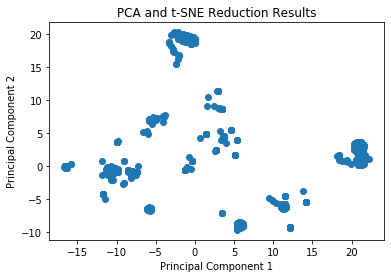

In [294]:
# Plot the results.
plt.scatter(df_tsne['principal component 1'],
            df_tsne['principal component 2'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA and t-SNE Reduction Results")
plt.show()

# Cluster Analysis with k-Means

In [295]:
# Import.
from sklearn.cluster import KMeans

In [296]:
# Create Elbow Plot Data; compare k with Inertia.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values.
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Create the Elbow Curve DataFrame.
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,96252.382812
1,2,47845.335938
2,3,25178.021484
3,4,15745.387695
4,5,6904.961426
5,6,5567.308594
6,7,4423.149414
7,8,3493.198730
8,9,2662.219727
9,10,1892.068481


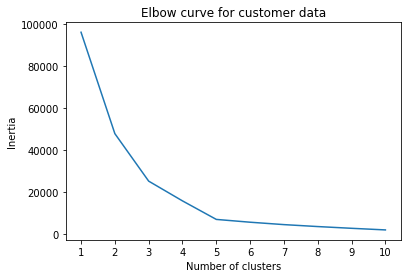

In [297]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [298]:
# Initialize the K-Means model; create functions.

def cluster(k, data):
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model.
    model.fit(data)

    # Predict clusters.
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters.
    data["class"] = model.labels_

    # Show Clusters in DataFrame.
    return data

def plotCluster(df):
    k = len(df["class"].unique())
    plt.scatter(df['principal component 1'],
                df['principal component 2'], 
                c=df['class'])
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"k-Means Cluster Analysis (k={k})")
    plt.show()


In [301]:
# Define desired parameters.
k = 5
data = df_tsne

# Show DataFrame
df_cluster = cluster(k,data)
df_cluster

,principal component 1,principal component 2,class
0,20.714260,3.640543,0
1,21.539192,0.274929,0
2,-5.753763,6.815358,2
3,-16.573538,0.034431,1
4,-8.089300,-0.760758,1
...,...,...,...
527,-0.507315,-0.461000,2
528,20.751259,2.008825,0
529,-9.943124,3.684496,1
530,-11.781050,-4.182604,1


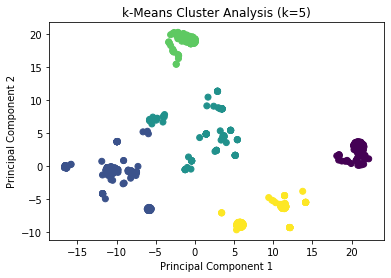

In [303]:
# Plot the clusters.
plotCluster(df_cluster)

# Recommendations
The cryptocurrencies evaluated can be grouped together with similar cryptocurrencies. Using Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) dimensionality reduction techniques and given the hyper-parameters used, it was determined from the elbow curve that the cryptocurrencies can be grouped into five clusters. The conclusion is supported by looking at the cleanly separated clusters in the final scatter plot.